## mqttPlotQakEvents.py

connected to broker  localhost
subscribing to unibo/qak/events
collecting values; please wait ...
evMsg= msg( androidSensor, event, android, none, androidSensor(rotVector, -173.4833625029822, 0.31718328620438757, -1.1870421613534936), 1821 ) msgnum= 0
evMsg= msg( androidSensor, event, android, none, androidSensor(rotVector, -96.43516085365405, -1.300101215467657, -1.4020518206704407), 1841 ) msgnum= 20
evMsg= msg( androidSensor, event, android, none, androidSensor(rotVector, 6.776315626047452, -1.0475814378894692, 1.1148135512108435), 1861 ) msgnum= 40
evMsg= msg( androidSensor, event, android, none, androidSensor(rotVector, 5.0776723389010225, -0.540212628143561, 1.3812737448850272), 1881 ) msgnum= 60


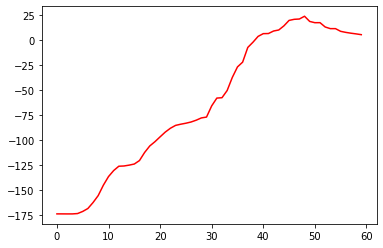

bye


In [3]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 30
x        = []
y        = []
z        = []
goon     = True
msgnum   = 0 
def on_message(client, userdata, message) :   #define callback
    global msgnum,  x,y,z, goon
    if not goon :
        return
    #msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
    #msg(g521,event, gyroSender, none, g521(TYPE,X,Y,Z),MSGNUM)
    evMsg = str( message.payload.decode("utf-8")  )
    msgitems = evMsg.split(",")
    if msgnum < 60  :
        if msgnum % 20 == 0  :
            print("evMsg=", evMsg, "msgnum=", msgnum )
        msgnum = msgnum + 1
        x.append( float( msgitems[5] ) )
        y.append( float( msgitems[6] ) )
        vz = float( msgitems[7].split(')')[0] )
        z.append( vz )
    else  :
        print("evMsg=", evMsg, "msgnum=", msgnum )
        plt.plot(list(x), color='red')
        #plt.plot(list(y), color='green')
        #plt.plot(list(z), color='blue')
        plt.show()
        goon = False
        client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback

client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe

print("collecting values; please wait ..." )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        
